# Analisis Pelanggan Supermarket: Segmentasi dan Risiko Churn

## Deskripsi Proyek
Proyek ini merupakan bagian dari analisis data pelanggan supermarket menggunakan dataset `Supermarket_Customers.csv`. Tujuan utama proyek ini adalah untuk memahami perilaku pelanggan melalui segmentasi berdasarkan pendapatan (`Income`) dan pengeluaran (`Total Spending`), mengidentifikasi pelanggan berisiko churn tinggi berdasarkan `Recency`, serta melakukan penanganan outlier untuk distribusi `Income`. Analisis dilakukan menggunakan Python (Jupyter Notebook) untuk pemrosesan data dan visualisasi awal, serta Tableau untuk membuat dashboard interaktif.

### Tujuan
1. Menganalisis distribusi `Recency` untuk pelanggan berisiko churn tinggi.
2. Melakukan segmentasi pelanggan berdasarkan `Income` dan `Total Spending` (Low, Medium, High).
3. Membersihkan data dengan penanganan outlier pada kolom `Income` menggunakan metode IQR.
4. Membuat dashboard interaktif di Tableau untuk memvisualisasikan hasil analisis.

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
# Upload & Load Data
df = pd.read_csv("Supermarket Customers 2.csv")

# Tampilkan beberapa baris pertama, info, dan deskripsi data
print("=== Head of the Dataset ===")
display(df.head())

print("\n=== Info Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
display(df.describe())


=== Head of the Dataset ===


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total Spending,income - spending
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,0,0,0,0,0,3,11,1,1617,56521
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,0,0,0,0,0,3,11,0,27,46317
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,70837
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,0,0,0,0,0,3,11,0,53,26593
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,57871



=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchase

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total Spending,income - spending
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214,51081.661161
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288,25219.493309
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000,-1679.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000,34667.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000,50793.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000,67089.250000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,666604.000000


In [ ]:
# Handling Missing Values & Data Wrangling

# Hitung missing values per kolom
missing_count = df.isnull().sum()
missing_ratio = (missing_count / len(df)) * 100

print("=== Missing Values per Kolom ===")
for col in df.columns:
    print(f"{col}: {missing_count[col]} missing ({missing_ratio[col]:.2f}%)")

# Drop kolom dengan missing ratio > 50%
threshold_col = 50.0
cols_to_drop = [col for col in df.columns if missing_ratio[col] > threshold_col]
print("\nKolom yang akan di-drop (missing > 50%):", cols_to_drop)
df.drop(columns=cols_to_drop, inplace=True)

# Pisahkan kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Imputasi untuk kolom numerik dengan median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Imputasi kolom {col} dengan median: {median_value}")

# Imputasi untuk kolom kategorikal dengan modus
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Imputasi kolom {col} dengan modus: {mode_value}")

print("\n=== Missing Values Setelah Penanganan ===")
print(df.isnull().sum())


=== Missing Values per Kolom ===
ID: 0 missing (0.00%)
Year_Birth: 0 missing (0.00%)
Education: 0 missing (0.00%)
Marital_Status: 0 missing (0.00%)
Income: 24 missing (1.07%)
Kidhome: 0 missing (0.00%)
Teenhome: 0 missing (0.00%)
Dt_Customer: 0 missing (0.00%)
Recency: 0 missing (0.00%)
MntWines: 0 missing (0.00%)
MntFruits: 0 missing (0.00%)
MntMeatProducts: 0 missing (0.00%)
MntFishProducts: 0 missing (0.00%)
MntSweetProducts: 0 missing (0.00%)
MntGoldProds: 0 missing (0.00%)
NumDealsPurchases: 0 missing (0.00%)
NumWebPurchases: 0 missing (0.00%)
NumCatalogPurchases: 0 missing (0.00%)
NumStorePurchases: 0 missing (0.00%)
NumWebVisitsMonth: 0 missing (0.00%)
AcceptedCmp3: 0 missing (0.00%)
AcceptedCmp4: 0 missing (0.00%)
AcceptedCmp5: 0 missing (0.00%)
AcceptedCmp1: 0 missing (0.00%)
AcceptedCmp2: 0 missing (0.00%)
Complain: 0 missing (0.00%)
Z_CostContact: 0 missing (0.00%)
Z_Revenue: 0 missing (0.00%)
Response: 0 missing (0.00%)
Total Spending: 0 missing (0.00%)
income - spending: 0

/var/folders/rb/swpbdkdx0wqdp48gb6zpkpj40000gn/T/ipykernel_2937/4278535382.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [ ]:
# Feature Engineering

# Hitung kolom Age dari Year_Birth (jika ada)
if 'Year_Birth' in df.columns:
    current_year = datetime.now().year
    df['Age'] = current_year - df['Year_Birth']

# Buat kolom Total Spending dari kategori pembelian
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
if all(col in df.columns for col in spending_cols):
    df['Total Spending'] = df[spending_cols].sum(axis=1)
else:
    print("Beberapa kolom spending tidak ditemukan. Mohon cek nama kolom!")

# Buat kolom selisih antara Income dan Total Spending
if 'Income' in df.columns and 'Total Spending' in df.columns:
    df['Income - Spending'] = df['Income'] - df['Total Spending']

print("\n=== Contoh Data Setelah Feature Engineering ===")
display(df.head())



=== Contoh Data Setelah Feature Engineering ===


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total Spending,income - spending,Age,Income - Spending
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,0,0,0,3,11,1,1617,56521,68,56521.0
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,0,0,0,3,11,0,27,46317,71,46317.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,776,70837,60,70837.0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,0,0,0,3,11,0,53,26593,41,26593.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,422,57871,44,57871.0


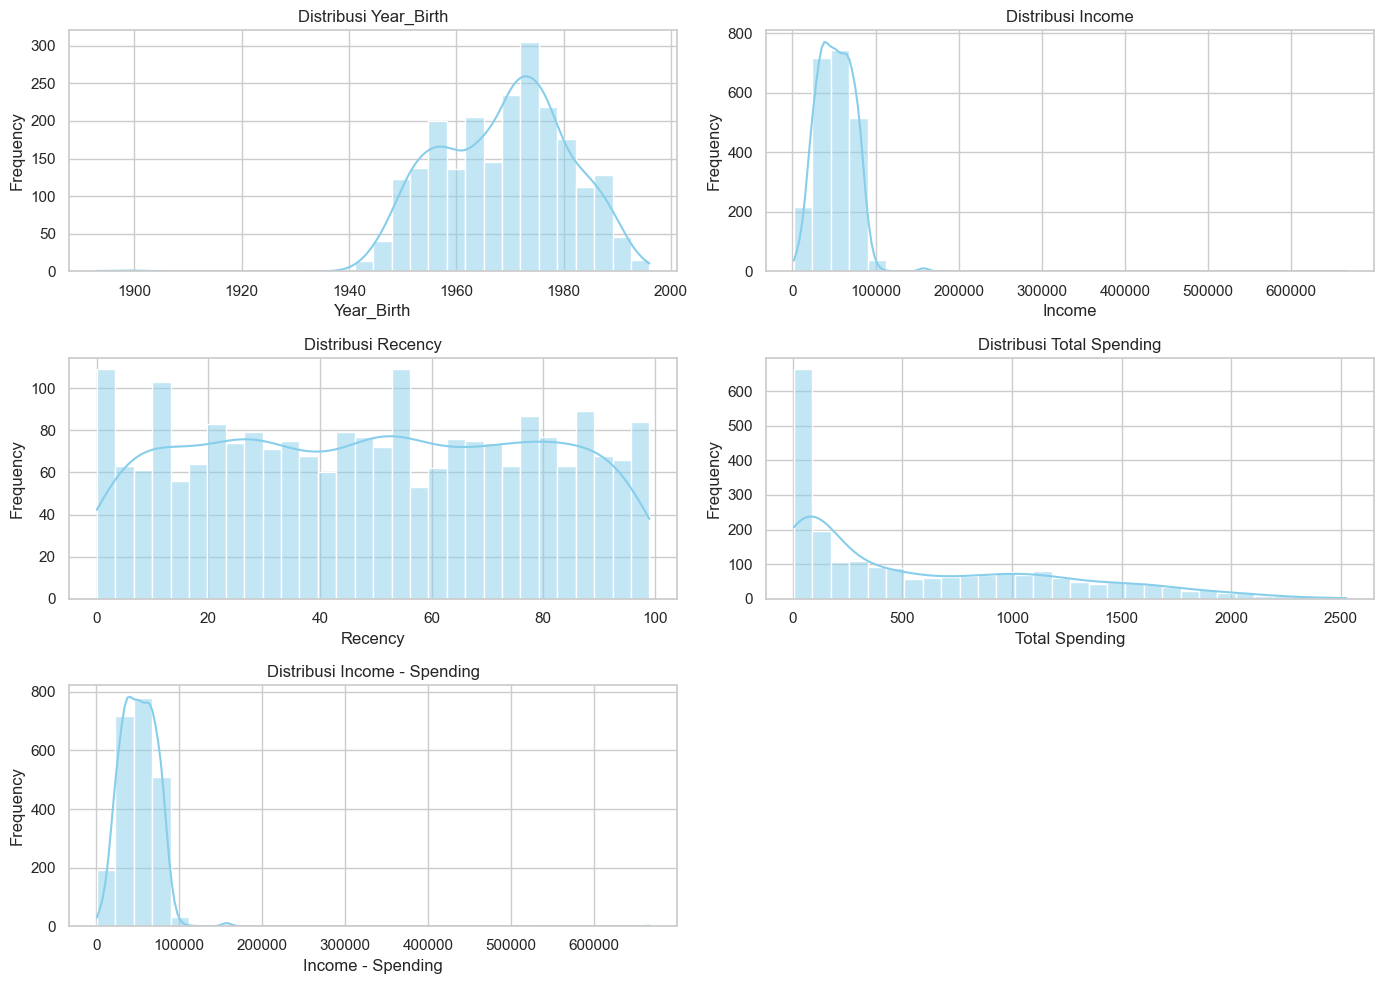

In [ ]:
# EDA - Analisis Univariate
cols_for_univariate = ['Year_Birth', 'Income', 'Recency', 'Total Spending', 'Income - Spending']

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_for_univariate):
    if col in df.columns:
        plt.subplot(3, 2, i+1)
        sns.histplot(df[col], bins=30, kde=True, color='skyblue')
        plt.title(f"Distribusi {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


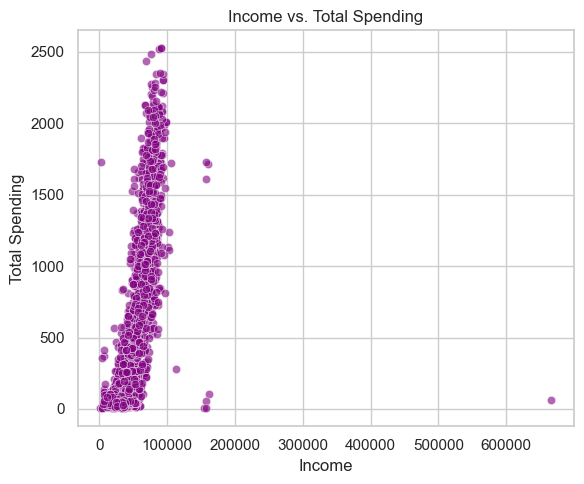

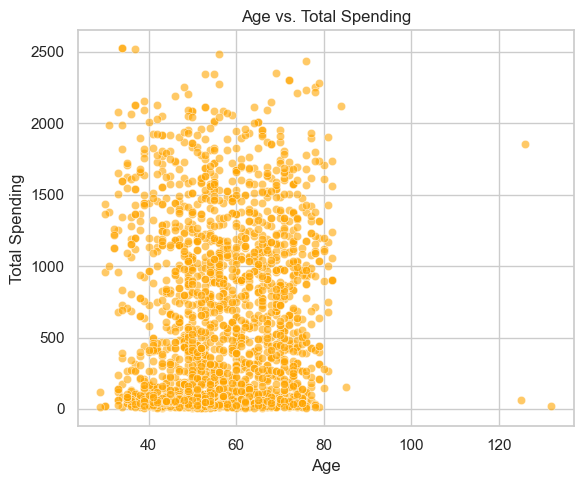

In [ ]:
# EDA - Analisis Bivariate

# Scatter Plot: Income vs. Total Spending
if 'Income' in df.columns and 'Total Spending' in df.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x='Income', y='Total Spending', alpha=0.6, color='purple')
    plt.title("Income vs. Total Spending")
    plt.xlabel("Income")
    plt.ylabel("Total Spending")
    plt.tight_layout()
    plt.show()

# Scatter Plot: Age vs. Total Spending
if 'Age' in df.columns and 'Total Spending' in df.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x='Age', y='Total Spending', alpha=0.6, color='orange')
    plt.title("Age vs. Total Spending")
    plt.xlabel("Age")
    plt.ylabel("Total Spending")
    plt.tight_layout()
    plt.show()


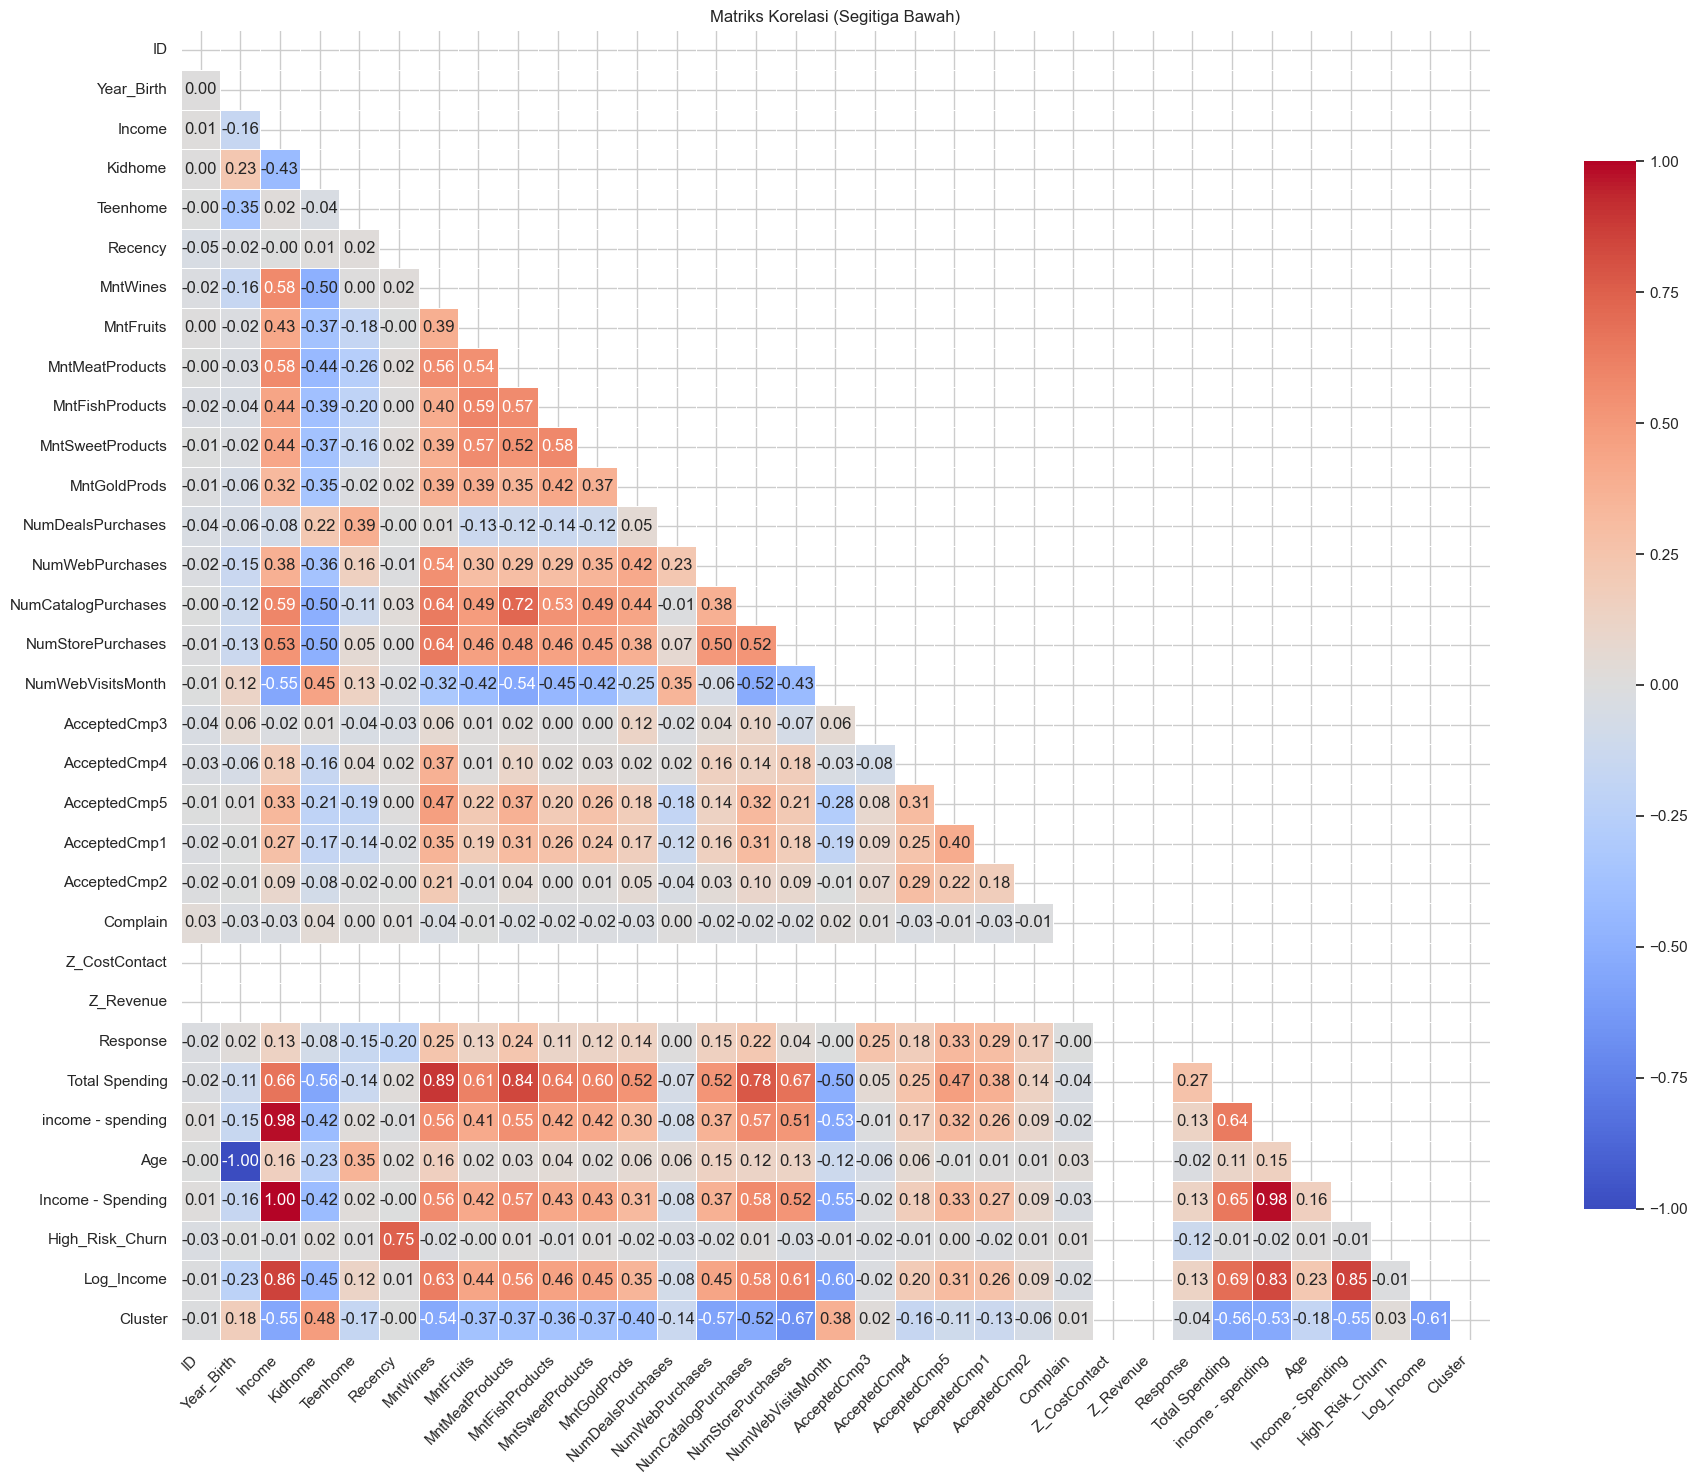

In [ ]:
# Visualisasi Korelasi
num_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[num_cols].corr()

# Buat mask untuk segitiga atas
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, 
            mask=mask, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f', 
            vmin=-1, vmax=1,
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8})
plt.title("Matriks Korelasi (Segitiga Bawah)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

corr_melted = corr_matrix.reset_index().melt(id_vars='index')
corr_melted.columns = ['Variable1', 'Variable2', 'Correlation']
corr_melted.to_csv("correlation_matrix_melted.csv", index=False)



In [ ]:
# Analisa Hasil Figur

print("=== Analisa Histogram dan Visualisasi ===\n")

# Analisa Histogram Year_Birth
print("1. Histogram Year_Birth:")
print("   - Mayoritas pelanggan lahir antara tahun 1940-an dan 1980-an, mengindikasikan bahwa pelanggan utama adalah dewasa hingga senior.")
print("   - Insight: Strategi pemasaran harus disesuaikan dengan preferensi kelompok usia ini.\n")

# Analisa Histogram Income
print("2. Histogram Income:")
print("   - Distribusi pendapatan menunjukkan kebanyakan pelanggan memiliki pendapatan di bawah nilai tertentu, dengan ekor kanan yang menunjukkan adanya outlier dengan pendapatan sangat tinggi.")
print("   - Insight: Perlu segmentasi khusus dan transformasi log untuk mengurangi dampak outlier.\n")

# Analisa Histogram Recency
print("3. Histogram Recency:")
print("   - Sebagian besar pelanggan memiliki nilai Recency yang rendah, artinya mereka baru-baru ini melakukan transaksi.")
print("   - Namun ada juga pelanggan dengan nilai Recency tinggi, yang berpotensi mengalami churn.")
print("   - Insight: Program retensi harus difokuskan pada pelanggan dengan Recency tinggi.\n")

# Analisa Histogram Total Spending
print("4. Histogram Total Spending:")
print("   - Distribusi Total Spending menunjukkan bahwa sebagian besar pelanggan menghabiskan nilai sedang, namun terdapat segmen high spender yang potensial.")
print("   - Insight: Fokus pada program loyalitas dan upselling untuk high spender serta strategi peningkatan bagi low spender.\n")

# Analisa Histogram Income - Spending
print("5. Histogram Income - Spending:")
print("   - Histogram ini menunjukkan selisih antara pendapatan dan pengeluaran. Nilai yang besar mengindikasikan potensi simpanan tinggi atau penggunaan budget yang belum maksimal.")
print("   - Insight: Dapat digunakan untuk mengidentifikasi pelanggan dengan potensi peningkatan spending.\n")

# Analisa Scatter Plot Income vs. Total Spending
print("6. Scatter Plot Income vs. Total Spending:")
print("   - Terdapat korelasi positif antara Income dan Total Spending, meskipun terdapat beberapa outlier.")
print("   - Insight: Pelanggan dengan pendapatan tinggi cenderung menghabiskan lebih banyak, namun perlu analisa mendalam pada outlier.\n")

# Analisa Heatmap Korelasi
print("7. Heatmap Korelasi:")
print("   - Matriks korelasi menunjukkan hubungan yang signifikan antara Income dan Total Spending serta korelasi negatif antara Recency dengan Total Spending.")
print("   - Insight: Variabel Income dapat menjadi prediktor utama untuk Total Spending, dan pelanggan dengan Recency tinggi berpotensi mengalami penurunan spending.\n")


=== Analisa Histogram dan Visualisasi ===

1. Histogram Year_Birth:
   - Mayoritas pelanggan lahir antara tahun 1940-an dan 1980-an, mengindikasikan bahwa pelanggan utama adalah dewasa hingga senior.
   - Insight: Strategi pemasaran harus disesuaikan dengan preferensi kelompok usia ini.

2. Histogram Income:
   - Distribusi pendapatan menunjukkan kebanyakan pelanggan memiliki pendapatan di bawah nilai tertentu, dengan ekor kanan yang menunjukkan adanya outlier dengan pendapatan sangat tinggi.
   - Insight: Perlu segmentasi khusus dan transformasi log untuk mengurangi dampak outlier.

3. Histogram Recency:
   - Sebagian besar pelanggan memiliki nilai Recency yang rendah, artinya mereka baru-baru ini melakukan transaksi.
   - Namun ada juga pelanggan dengan nilai Recency tinggi, yang berpotensi mengalami churn.
   - Insight: Program retensi harus difokuskan pada pelanggan dengan Recency tinggi.

4. Histogram Total Spending:
   - Distribusi Total Spending menunjukkan bahwa sebagian besar 

Jumlah pelanggan berisiko churn: 551

Statistik Total Spending untuk pelanggan high-risk churn:


count     551.000000
mean      596.437387
std       616.320155
min         6.000000
25%        65.000000
50%       309.000000
75%      1048.500000
max      2440.000000
Name: Total Spending, dtype: float64

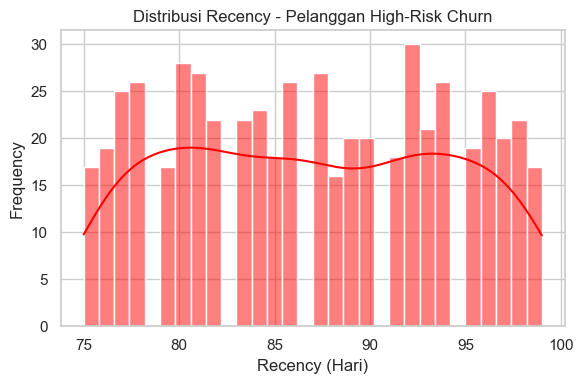

In [ ]:
# Analisis Retention Strategies (High-Risk Churn)
# Asumsikan kolom 'Recency' sudah ada dan kita telah menentukan threshold (misalnya kuartil ke-75)
recency_threshold = df['Recency'].quantile(0.75)
df['High_Risk_Churn'] = df['Recency'].apply(lambda x: 1 if x > recency_threshold else 0)

# Filter pelanggan yang berisiko churn
high_risk_customers = df[df['High_Risk_Churn'] == 1]

# Tampilkan jumlah dan statistik spending dari pelanggan high-risk churn
print("Jumlah pelanggan berisiko churn:", high_risk_customers.shape[0])
print("\nStatistik Total Spending untuk pelanggan high-risk churn:")
display(high_risk_customers['Total Spending'].describe())

# Visualisasi distribusi Recency untuk pelanggan high-risk churn
plt.figure(figsize=(6,4))
sns.histplot(high_risk_customers['Recency'], bins=30, kde=True, color='red')
plt.title("Distribusi Recency - Pelanggan High-Risk Churn")
plt.xlabel("Recency (Hari)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Insight: Pelanggan dengan Recency tinggi merupakan target utama untuk program retensi


Segmentasi Income:


Income_Segment
Low       747
High      747
Medium    746
Name: count, dtype: int64


Statistik Income per Segment:


/var/folders/rb/swpbdkdx0wqdp48gb6zpkpj40000gn/T/ipykernel_2937/1047872610.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('Income_Segment')['Income'].describe())


,count,mean,std,min,25%,50%,75%,max
Income_Segment,,,,,,,,
Low,747.0,28445.053548,8463.506575,1730.0,22738.0,30093.0,35533.50,40479.0
Medium,746.0,51557.513405,6448.833021,40521.0,46088.0,51381.5,57065.25,62845.0
High,747.0,76710.448461,24522.349886,62847.0,68298.5,74290.0,80988.50,666666.0


/var/folders/rb/swpbdkdx0wqdp48gb6zpkpj40000gn/T/ipykernel_2937/1047872610.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/rb/swpbdkdx0wqdp48gb6zpkpj40000gn/T/ipykernel_2937/1047872610.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


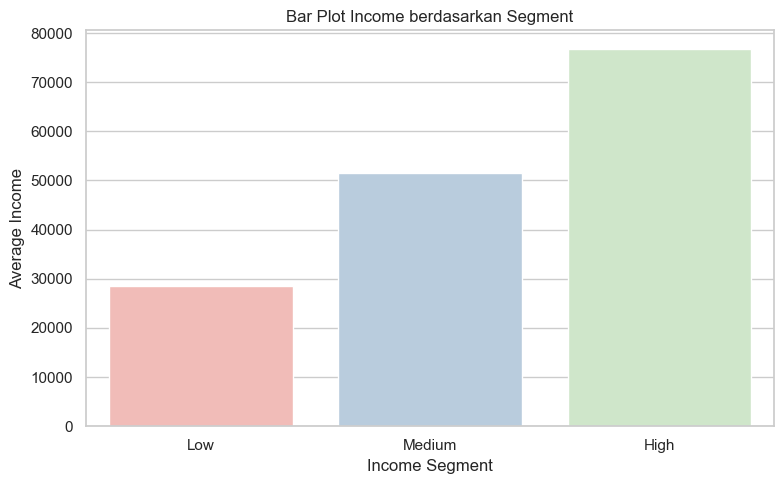

In [ ]:
# Income-Based Segmentation
import numpy as np

# Tambahkan kolom log_income (jika belum ada)
df['Log_Income'] = np.log1p(df['Income'])  # np.log1p menghindari log(0)

# Segmentasi Income menggunakan quantile
df['Income_Segment'] = pd.qcut(df['Income'], q=3, labels=['Low', 'Medium', 'High'])

# Tampilkan jumlah pelanggan per segmen
print("Segmentasi Income:")
display(df['Income_Segment'].value_counts())

# Tampilkan statistik pendapatan per segmen
print("\nStatistik Income per Segment:")
display(df.groupby('Income_Segment')['Income'].describe())

# Visualisasi distribusi Income per segmen dengan bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Income_Segment', 
    y='Income', 
    data=df, 
    estimator=np.mean,  # Menampilkan rata-rata pendapatan per segmen
    ci=None, 
    palette='Pastel1'
)
plt.title("Bar Plot Income berdasarkan Segment")
plt.xlabel("Income Segment")
plt.ylabel("Average Income")
plt.tight_layout()
plt.show()

Segmentasi Total Spending:


Spending_Segment
Low       748
High      747
Medium    745
Name: count, dtype: int64


Statistik Total Spending per Spending Segment:


/var/folders/rb/swpbdkdx0wqdp48gb6zpkpj40000gn/T/ipykernel_2937/2175610631.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('Spending_Segment')['Total Spending'].describe())


,count,mean,std,min,25%,50%,75%,max
Spending_Segment,,,,,,,,
Low,748.0,51.219251,25.833211,5.0,30.0,48.0,69.0,114.0
Medium,745.0,412.975839,210.612782,115.0,227.0,396.0,581.0,825.0
High,747.0,1353.425703,372.132523,832.0,1046.0,1280.0,1605.5,2525.0


/var/folders/rb/swpbdkdx0wqdp48gb6zpkpj40000gn/T/ipykernel_2937/2175610631.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/rb/swpbdkdx0wqdp48gb6zpkpj40000gn/T/ipykernel_2937/2175610631.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


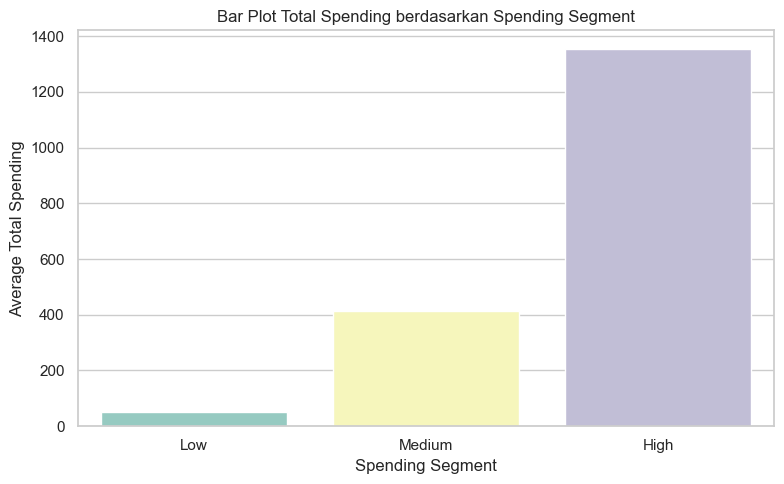

In [ ]:
# Focus on High Spenders
# Segmentasi Total Spending menggunakan quantile
df['Spending_Segment'] = pd.qcut(df['Total Spending'], q=3, labels=['Low', 'Medium', 'High'])

# Tampilkan jumlah pelanggan per segmen spending
print("Segmentasi Total Spending:")
display(df['Spending_Segment'].value_counts())

# Tampilkan statistik Total Spending per segmen
print("\nStatistik Total Spending per Spending Segment:")
display(df.groupby('Spending_Segment')['Total Spending'].describe())

# Visualisasi distribusi Total Spending per segmen dengan bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Spending_Segment', 
    y='Total Spending', 
    data=df, 
    estimator=np.mean,  # Menampilkan rata-rata pengeluaran per segmen
    ci=None, 
    palette='Set3'
)
plt.title("Bar Plot Total Spending berdasarkan Spending Segment")
plt.xlabel("Spending Segment")
plt.ylabel("Average Total Spending")
plt.tight_layout()
plt.show()

# Insight: Pelanggan high spender (segment 'High') dapat difokuskan untuk program loyalitas dan upselling.

Dimensi sebelum menghapus outlier Income: (2240, 37)
Dimensi setelah menghapus outlier Income: (2232, 37)

Dimensi sebelum menghapus outlier Total Spending: (2240, 37)
Dimensi setelah menghapus outlier Total Spending: (2237, 37)


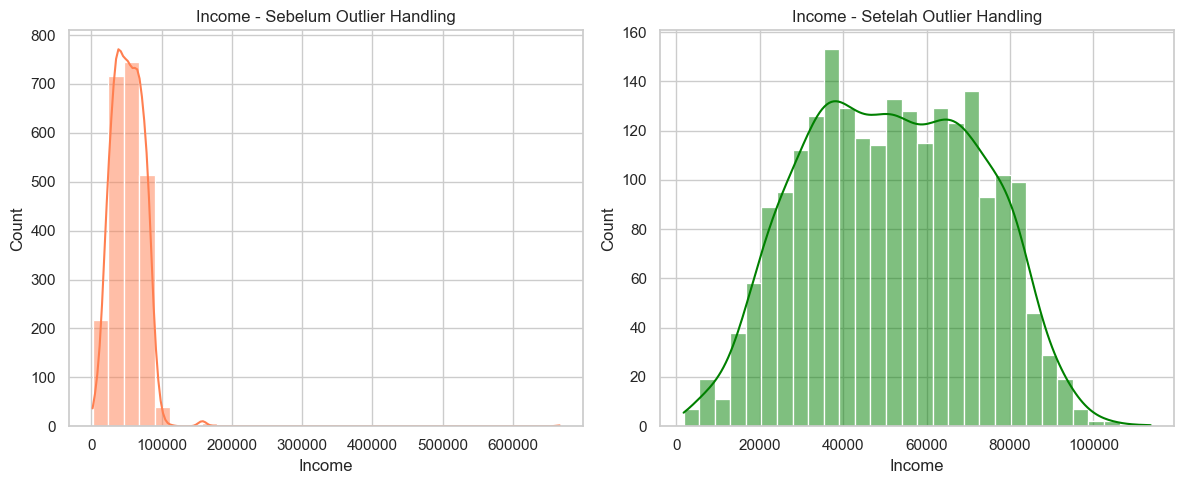

In [ ]:
# Data Preprocessing - Outlier Handling (metode IQR)

def remove_outliers_iqr(dataframe, col, multiplier=1.5):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]

# Tangani outlier untuk Income
df_income_no_outliers = remove_outliers_iqr(df, 'Income')
print("Dimensi sebelum menghapus outlier Income:", df.shape)
print("Dimensi setelah menghapus outlier Income:", df_income_no_outliers.shape)

# Tangani outlier untuk Total Spending
df_spending_no_outliers = remove_outliers_iqr(df, 'Total Spending')
print("\nDimensi sebelum menghapus outlier Total Spending:", df.shape)
print("Dimensi setelah menghapus outlier Total Spending:", df_spending_no_outliers.shape)

# Visualisasi perbandingan distribusi Income sebelum dan sesudah outlier handling
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Income'], bins=30, kde=True, color='coral')
plt.title("Income - Sebelum Outlier Handling")
plt.xlabel("Income")

plt.subplot(1,2,2)
sns.histplot(df_income_no_outliers['Income'], bins=30, kde=True, color='green')
plt.title("Income - Setelah Outlier Handling")
plt.xlabel("Income")
plt.tight_layout()
plt.show()


Jumlah Pelanggan per Cluster:


Cluster
2    1133
0     652
1     455
Name: count, dtype: int64


Pusat Cluster (skala asli):


,Income,Total Spending
0,63172.043077,768.147692
1,79529.247817,1563.301310
2,34917.704505,125.176678


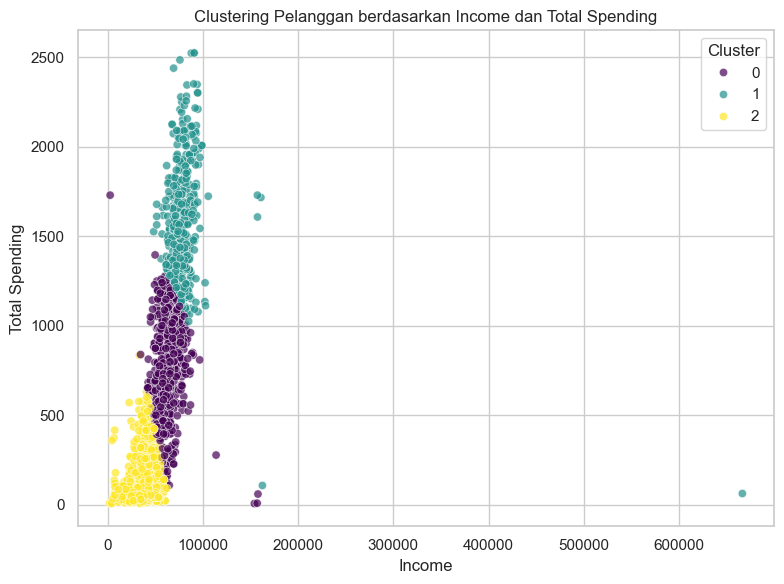

In [ ]:
# Advanced Analytics - Clustering Pelanggan
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih fitur untuk clustering: Income dan Total Spending
features = df[['Income', 'Total Spending']].copy()

# Standarisasi fitur agar memiliki skala yang sama
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Tentukan jumlah cluster (misal 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Tampilkan jumlah pelanggan per cluster
print("Jumlah Pelanggan per Cluster:")
display(df['Cluster'].value_counts())

# Tampilkan pusat cluster dalam skala asli
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=['Income', 'Total Spending'])
print("\nPusat Cluster (skala asli):")
display(centers_df)

# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Income', y='Total Spending', hue='Cluster', palette='viridis', alpha=0.7)
plt.title("Clustering Pelanggan berdasarkan Income dan Total Spending")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

# Insight: Cluster yang terbentuk dapat menjadi dasar untuk strategi pemasaran tersegmen.


In [ ]:
# Simpan Dataset Bersih
df.to_csv("Supermarket_Customers_Cleaned.csv", index=False)
print("Dataset bersih telah disimpan sebagai 'Supermarket_Customers_Cleaned.csv'")

Dataset bersih telah disimpan sebagai 'Supermarket_Customers_Cleaned.csv'


In [ ]:
# Kesimpulan dan Rekomendasi
print("========================================")
print("       FINAL CONCLUSION & RECOMMENDATION")
print("========================================\n")

print("1. CONCLUSION:")
print("   a. Age Distribution:")
print("      - Mayoritas pelanggan berasal dari generasi yang lahir antara 1940-an dan 1980-an, sehingga pelanggan utama adalah dewasa hingga senior.")
print()
print("   b. Income Distribution:")
print("      - Distribusi pendapatan menunjukkan pola right-skewed dengan sebagian besar pelanggan memiliki pendapatan rendah hingga menengah,")
print("        namun terdapat outlier dengan pendapatan sangat tinggi. Transformasi log dapat membantu analisis lebih lanjut.")
print()
print("   c. Recency:")
print("      - Sebagian pelanggan memiliki nilai Recency tinggi, menandakan mereka sudah lama tidak bertransaksi dan berisiko churn.")
print()
print("   d. Total Spending:")
print("      - Terdapat segmen pelanggan high spender yang potensial dan segmen low spender yang perlu dioptimalkan.")
print()
print("   e. Korelasi:")
print("      - Income dan Total Spending memiliki korelasi positif yang kuat. Recency berkorelasi negatif dengan Total Spending.")
print()
print("2. RECOMMENDATIONS:")
print("   a. Retention Strategies:")
print("      - Kembangkan program retensi untuk pelanggan dengan Recency tinggi, misalnya dengan penawaran eksklusif dan reminder.")
print("   b. Income-Based Segmentation:")
print("      - Terapkan transformasi log pada Income dan segmentasikan pelanggan ke dalam kategori Low, Medium, dan High.")
print("   c. Focus on High Spenders:")
print("      - Identifikasi dan kembangkan program loyalitas serta strategi upselling untuk pelanggan high spender.")
print("   d. Data Preprocessing:")
print("      - Tangani outlier (misalnya dengan winsorizing) agar analisa tidak terdistorsi.")
print("      - Pastikan missing values ditangani secara konsisten untuk menjaga kualitas data.")
print("   e. Advanced Analytics:")
print("      - Gunakan hasil korelasi untuk membangun model prediktif (seperti regresi atau clustering) guna mendukung strategi pemasaran yang lebih tepat.")
print("\n========================================")
print("         END OF ANALYSIS")
print("========================================")


       FINAL CONCLUSION & RECOMMENDATION

1. CONCLUSION:
   a. Age Distribution:
      - Mayoritas pelanggan berasal dari generasi yang lahir antara 1940-an dan 1980-an, sehingga pelanggan utama adalah dewasa hingga senior.

   b. Income Distribution:
      - Distribusi pendapatan menunjukkan pola right-skewed dengan sebagian besar pelanggan memiliki pendapatan rendah hingga menengah,
        namun terdapat outlier dengan pendapatan sangat tinggi. Transformasi log dapat membantu analisis lebih lanjut.

   c. Recency:
      - Sebagian pelanggan memiliki nilai Recency tinggi, menandakan mereka sudah lama tidak bertransaksi dan berisiko churn.

   d. Total Spending:
      - Terdapat segmen pelanggan high spender yang potensial dan segmen low spender yang perlu dioptimalkan.

   e. Korelasi:
      - Income dan Total Spending memiliki korelasi positif yang kuat. Recency berkorelasi negatif dengan Total Spending.

2. RECOMMENDATIONS:
   a. Retention Strategies:
      - Kembangkan program ret